# **PH·∫¶N 2: M√î H√åNH HO√Å D·ªÆ LI·ªÜU**

## **1. Import c√°c packages c·∫ßn thi·∫øt**

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime 
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import FunctionTransformer

# from keras.layers import Dense
# from keras.models import Sequential
# from keras.optimizers import SGD
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold, cross_validate, KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

pd.set_option('display.max_columns', None)
import warnings 
warnings.filterwarnings("ignore")

## **2. ƒê·ªçc d·ªØ li·ªáu t·ª´ file csv**

In [131]:
df = pd.read_csv('../features/processed.csv')
df.shape

(48291, 24)

In [132]:
df.sample(5)

id            sku  \
39832  186677830  7823425372366   
23954  183540566  4985955766222   
35420  192862164  2612655313671   
30420  194200737  8458067879118   
44102  192560885  7126767635881   

                                                    name  \
39832      S√°ch B√≠ ·∫®n C·ªßa L·ªãch S·ª≠ - Mysteries In History   
23954  Quy Tr√¨nh K·ªπ Thu·∫≠t Nh√¢n Gi·ªëng, Tr·ªìng V√† S∆° Ch·∫ø...   
35420                  Gi·∫£i M√£ Ng√†nh C√¥ng Nghi·ªáp √Çm Nh·∫°c   
30420  S√°ch B√†i T·∫≠p H·∫±ng Ng√†y Ti·∫øng Vi·ªát 3 - C√°nh Di·ªÅ...   
44102  H∆∞·ªõng D·∫´n Thi H√†nh Lu·∫≠t X·ª≠ L√Ω Vi Ph·∫°m H√†nh Ch√≠...   

                                               short_url book_cover   price  \
39832  https://tiki.vn/product-p186677830.html?spid=1...   B√¨a c·ª©ng  499000   
23954  https://tiki.vn/product-p183540566.html?spid=1...   B√¨a c·ª©ng  426000   
35420  https://tiki.vn/product-p192862164.html?spid=2...    B√¨a m·ªÅm  209000   
30420  https://tiki.vn/product-p194200737.html?spid=1...        NaN   48000   
44102  https://tiki.vn/product-p192560885.html?spid=1...    B√¨a m·ªÅm  381500   

       original_price  discount_rate  rating_average  review_count  \
39832          499000              0             0.0             0   
23954          426000              0             0.0             0   
35420          209000              0             0.0             0   
30420           60000             20             0.0             0   
44102          545000             30             0.0             0   

      inventory_type                              productset_group_name  \
39832      backorder  Nh√† S√°ch Tiki/S√°ch ti·∫øng Vi·ªát/S√°ch L·ªãch s·ª≠/L·ªãc...   
23954      backorder  Nh√† S√°ch Tiki/S√°ch ti·∫øng Vi·ªát/S√°ch k·ªπ nƒÉng s·ªën...   
35420      backorder  Nh√† S√°ch Tiki/S√°ch ti·∫øng Vi·ªát/S√°ch Ki·∫øn Th·ª©c T...   
30420      backorder  Nh√† S√°ch Tiki/S√°ch ti·∫øng Vi·ªát/S√°ch Tham Kh·∫£o/S...   
44102      backorder  Nh√† S√°ch Tiki/S√°ch ti·∫øng Vi·ªát/S√°ch Ch√≠nh Tr·ªã -...   

       day_ago_created                       categories  \
39832              166                 L·ªãch S·ª≠ Th·∫ø Gi·ªõi   
23954              186  S√°ch h∆∞·ªõng nghi·ªáp - K·ªπ nƒÉng m·ªÅm   
35420              127                    Lƒ©nh v·ª±c kh√°c   
30420              113             S√°ch tham kh·∫£o c·∫•p I   
44102              129              Lu·∫≠t - VƒÉn B·∫£n Lu·∫≠t   

       all_time_quantity_sold           authors  \
39832                       0               NaN   
23954                       0               NaN   
35420                       0  Donald S.Passman   
30420                       2               NaN   
44102                       0     V≈© Thu Ph∆∞∆°ng   

                                            publisher_vn     publication_date  \
39832  C√¥ng ty c·ªï ph·∫ßn ƒë·∫ßu t∆∞ v√† ph√°t tri·ªÉn gi√°o d·ª•c ...  2021-11-15 06:53:53   
23954  Trung T√¢m Ph√°t H√†nh S√°ch V√† VƒÉn H√≥a Ph·∫©m Khoa ...                  NaN   
35420                                        Alpha Books  2022-07-05 00:00:00   
30420                        C√¥ng ty c·ªï ph·∫ßn s√°ch Qbooks                  NaN   
44102                         Ph√°p lu·∫≠t S√†i G√≤n - H√† N·ªôi                  NaN   

      dimensions                      manufacturer  number_of_page dich_gia  \
39832        NaN             Nh√† Xu·∫•t B·∫£n Lao ƒê·ªông             256      NaN   
23954        NaN  Nh√† Xu·∫•t B·∫£n Khoa h·ªçc & k·ªπ thu·∫≠t             392      NaN   
35420        NaN             Nh√† Xu·∫•t B·∫£n Lao ƒê·ªông             490      NaN   
30420        NaN               Nh√† Xu·∫•t B·∫£n H√† N·ªôi             100      NaN   
44102        NaN     Nh√† Xu·∫•t B·∫£n C√¥ng An Nh√¢n D√¢n             600      NaN   

      edition luu_y  
39832     NaN   NaN  
23954     NaN   NaN  
35420     NaN   NaN  
30420     NaN   NaN  
44102     NaN   NaN

## **3. X√°c ƒë·ªãnh c√¢u h·ªèi c·∫ßn tr·∫£ l·ªùi:**
**B√†i to√°n d·ª± ƒëo√°n `discount_rate` d·ª±a tr√™n c√°c ƒë·∫∑c tr∆∞ng c·ªßa s·∫£n ph·∫©m.**
- ƒê√¢y l√† m·ªôt b√†i to√°n h·ªìi quy.
- Input l√† c√°c ƒë·∫∑c tr∆∞ng ·∫£nh h∆∞·ªüng ƒë·∫øn t·ªâ l·ªá gi·∫£m gi√° c·ªßa m·ªôt m·∫∑t h√†ng s√°ch.
- Output l√† t·ªâ l·ªá gi·∫£m gi√° c·ªßa s√°ch. 

**Tr·∫£ l·ªùi ƒë∆∞·ª£c c√¢u h·ªèi n√†y s·∫Ω gi√∫p cho c·∫£ kh√°ch h√†ng v√† nh√† b√°n c√≥ nh·ªØng l·ª£i √≠ch sau:**
- Nh√† b√°n quy·∫øt ƒë·ªãnh m·ª©c sale ph√π h·ª£p v·ªõi th·ªã tr∆∞·ªùng, t·ª´ ƒë√≥ b√°n ƒë∆∞·ª£c nhi·ªÅu s·∫£n ph·∫©m h∆°n.
- Ng∆∞·ªùi mua ch·ªçn ƒë∆∞·ª£c s·∫£n ph·∫©m gi√° r·∫ª, c√≥ m·ª©c sale cao, d·ª±a v√†o vi·ªác xem x√©t qua c√°c ƒë·∫∑c tr∆∞ng kh√°c.

## **4. Ph√¢n t√≠ch, x·ª≠ l√Ω v√† chu·∫©n b·ªã d·ªØ li·ªáu cho b∆∞·ªõc m√¥ h√¨nh ho√°**

C√°c c·ªôt c√≥ ki·ªÉu d·ªØ li·ªáu l√† numeric 

In [133]:
numeric_cols = df.select_dtypes(include=np.number).columns
numeric_cols

Index(['id', 'sku', 'price', 'original_price', 'discount_rate',
       'rating_average', 'review_count', 'day_ago_created',
       'all_time_quantity_sold', 'number_of_page'],
      dtype='object')

In [134]:
numeric_profiles = {'missing_ratio': df[numeric_cols].isna().sum() * 100.0/len(df[numeric_cols]),
                        'min': df[numeric_cols].min(),
                        'max': df[numeric_cols].max()}
nume_col_profiles_df = pd.DataFrame(numeric_profiles).transpose()
nume_col_profiles_df

id           sku      price  original_price  \
missing_ratio          0.0  0.000000e+00        0.0             0.0   
min               148562.0  1.000110e+12        0.0             0.0   
max            207990688.0  9.999995e+12  6000000.0       6950000.0   

               discount_rate  rating_average  review_count  day_ago_created  \
missing_ratio            0.0             0.0           0.0              0.0   
min                      0.0             0.0           0.0              0.0   
max                     91.0             5.0        6306.0           2689.0   

               all_time_quantity_sold  number_of_page  
missing_ratio                     0.0    0.000000e+00  
min                               0.0    0.000000e+00  
max                           32323.0    9.786049e+12

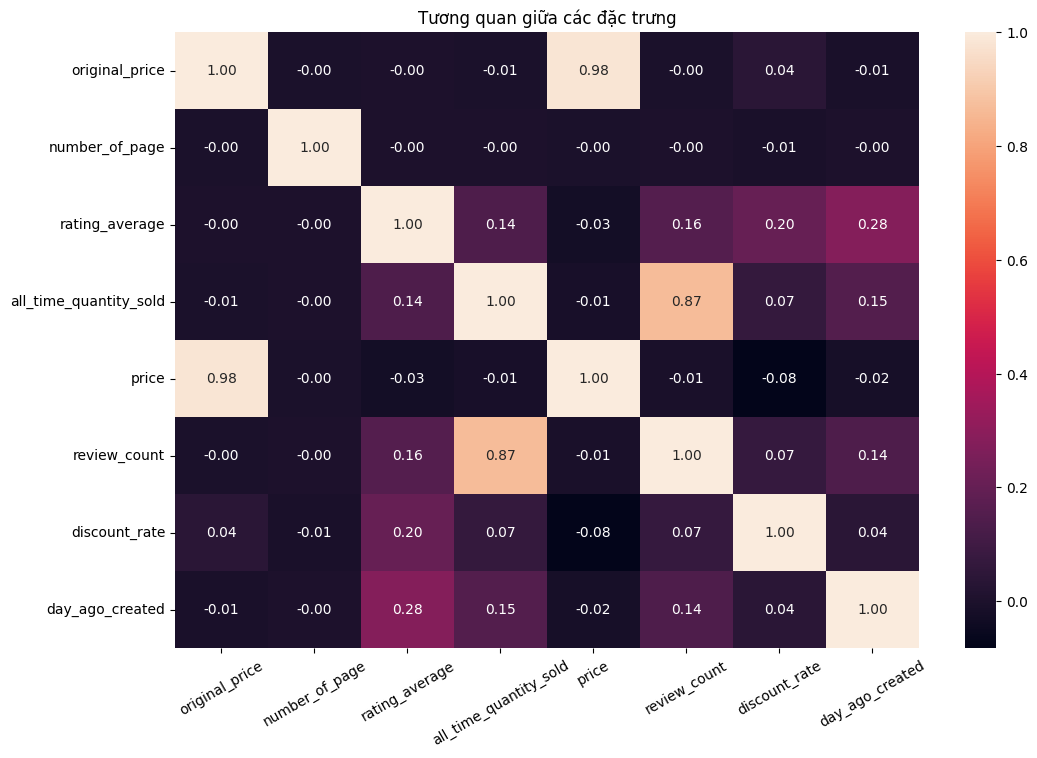

In [135]:
plt.figure(figsize=(12,8))
sns.heatmap(df[set(numeric_cols) - {'id', 'sku'}].corr(), annot=True, fmt='.2f')
plt.xticks(rotation=30)
plt.title('T∆∞∆°ng quan gi·ªØa c√°c ƒë·∫∑c tr∆∞ng')
plt.show()

In [136]:
cate_cols = set(df.columns) - set(numeric_cols)
cate_profiles = {'missing_ratio': df[cate_cols].isna().sum() * 100.0/len(df[cate_cols]),
               #   'zero_values_ratio':  df[cate_cols].eq(0).sum(axis=1) * 100.0/len(df[cate_cols]),
                      'num_diff_vals': df[cate_cols].nunique(dropna=True),
                      'diff_vals': df[cate_cols].stack(dropna=True).groupby(level=[1]).unique(),
                      }
cate_col_profiles_df = pd.DataFrame(cate_profiles).transpose()
cate_col_profiles_df

authors  \
missing_ratio                                          48.804125   
num_diff_vals                                               9094   
diff_vals      [Tr·∫ßn ƒê·∫∑ng ƒêƒÉng Khoa, Tr·∫ßn H·ªìng Ng·ªçc, L√™ Quang...   

                                                      book_cover  \
missing_ratio                                          35.358555   
num_diff_vals                                                 17   
diff_vals      [B√¨a m·ªÅm, B√¨a Da, B√¨a c·ª©ng, B√¨a g·∫≠p, B√¨a r·ªùi, ...   

                                                      categories  \
missing_ratio                                                0.0   
num_diff_vals                                                100   
diff_vals      [Du k√Ω, Light novel, Ph√™ B√¨nh - L√Ω Lu·∫≠n VƒÉn H·ªç...   

                                                        dich_gia  \
missing_ratio                                          85.686774   
num_diff_vals                                               3110   
diff_vals      [Kh√°nh V√¢n, Phan Quang, Nguy·ªÖn Th·ªã B·∫°ch Tuy·∫øt,...   

                                                      dimensions  \
missing_ratio                                          82.744197   
num_diff_vals                                               1051   
diff_vals      [13 x 20, 14,5 x 20,5 cm, 13.5 x 20.5 cm, 15 x...   

                                                         edition  \
missing_ratio                                          96.931105   
num_diff_vals                                                364   
diff_vals      [b√¨a m·ªÅm, B√åA M·ªÄM, Ti·∫øng Vi·ªát, T·∫∑ng k√®m bookma...   

                               inventory_type  \
missing_ratio                             0.0   
num_diff_vals                               3   
diff_vals      [instock, backorder, preorder]   

                                                           luu_y  \
missing_ratio                                          99.995858   
num_diff_vals                                                  1   
diff_vals      [S√°ch kh√¥ng c√≤n k√®m CD m√† thay b·∫±ng ·ª©ng d·ª•ng t...   

                                                    manufacturer  \
missing_ratio                                           0.550827   
num_diff_vals                                                168   
diff_vals      [NXB Tr·∫ª, Nh√† Xu·∫•t B·∫£n Lao ƒê·ªông, Nh√† Xu·∫•t B·∫£n ...   

                                                            name  \
missing_ratio                                                0.0   
num_diff_vals                                              44424   
diff_vals      [1111 - Nh·∫≠t K√Ω S√°u V·∫°n D·∫∑m Tr√™n Y√™n Xe C√† T√†n...   

                                           productset_group_name  \
missing_ratio                                                0.0   
num_diff_vals                                                101   
diff_vals      [Nh√† S√°ch Tiki/S√°ch ti·∫øng Vi·ªát/S√°ch vƒÉn h·ªçc/Du...   

                                                publication_date  \
missing_ratio                                          61.158394   
num_diff_vals                                              10896   
diff_vals      [2022-11-10 00:00:00, 2022-11-11 17:44:46, 202...   

                                                    publisher_vn  \
missing_ratio                                           0.035203   
num_diff_vals                                                852   
diff_vals      [NXB Tr·∫ª, Chibooks, VƒÉn Lang, Edibooks, NXB Ph...   

                                                       short_url  
missing_ratio                                                0.0  
num_diff_vals                                              48288  
diff_vals      [https://tiki.vn/product-p204317934.html?spid=...

In [137]:
cate_col_profiles_df.loc['diff_vals', 'categories']

array(['Du k√Ω', 'Light novel', 'Ph√™ B√¨nh - L√Ω Lu·∫≠n VƒÉn H·ªçc',
       'Ph√≥ng s·ª± - K√Ω s·ª± - B√∫t k√Ω', 'T√°c ph·∫©m kinh ƒëi·ªÉn', 'Th∆°',
       'Ti·ªÉu s·ª≠ - H·ªìi k√Ω', 'Ti·ªÉu Thuy·∫øt',
       'Truy·ªán Gi·∫£ t∆∞·ªüng - Huy·ªÅn B√≠ - Phi√™u L∆∞u', 'Tranh Truy·ªán',
       'Truy·ªán c·ªï t√≠ch - Ng·ª• ng√¥n', 'Truy·ªán c∆∞·ªùi', 'Truy·ªán d√†i',
       'B√†i h·ªçc kinh doanh', 'Truy·ªán ƒëam m·ªπ', 'Truy·ªán ki·∫øm hi·ªáp',
       'Truy·ªán kinh d·ªã', 'Truy·ªán ng·∫Øn - T·∫£n vƒÉn - T·∫°p VƒÉn',
       'Truy·ªán ng√¥n t√¨nh', 'Truy·ªán trinh th√°m', 'Ca dao - T·ª•c ng·ªØ',
       'S√°ch ·∫£nh', 'S√°ch doanh nh√¢n', 'S√°ch kh·ªüi nghi·ªáp',
       'S√°ch kinh t·∫ø h·ªçc', 'S√°ch k·ªπ nƒÉng l√†m vi·ªác',
       'S√°ch Marketing - B√°n h√†ng ', 'S√°ch qu·∫£n tr·ªã, l√£nh ƒë·∫°o',
       'S√°ch qu·∫£n tr·ªã nh√¢n l·ª±c', 'S√°ch t√†i ch√≠nh, k·∫ø to√°n',
       'S√°ch t√†i ch√≠nh, ti·ªÅn t·ªá', 'ƒê·∫°o ƒë·ª©c - K·ªπ nƒÉng s·ªëng',
       'Ki·∫øn th·ª©c - B√°ch khoa', 'T√¥ m

Ch·ªçn ra c√°c features ph√π h·ª£p/ c√≥ ·∫£nh h∆∞·ªüng ƒë·∫øn y√™u c·∫ßu b√†i to√°n l√†m ƒë·∫ßu v√†o cho m√¥ h√¨nh 

In [138]:
cols = ['original_price', 'discount_rate',
       'rating_average', 'review_count', 'day_ago_created',
       'all_time_quantity_sold', 'number_of_page']
# Th√™m m·ªôt v√†i c·ªôt categories c√≥ √Ω nghƒ©a ƒë·ªëi v·ªõi output
cate = ['book_cover', 'categories', 'inventory_type', 'manufacturer', 'publication_date']
cols.extend(cate)

Xem qua ki·ªÉu d·ªØ li·ªáu c·ªßa c√°c c·ªôt

In [139]:
df[cols].dtypes

original_price              int64
discount_rate               int64
rating_average            float64
review_count                int64
day_ago_created             int64
all_time_quantity_sold      int64
number_of_page              int64
book_cover                 object
categories                 object
inventory_type             object
manufacturer               object
publication_date           object
dtype: object

In [140]:
df[['categories', 'inventory_type', 'manufacturer']] = df[['categories', 'inventory_type', 'manufacturer']].astype(str)
df[['categories', 'inventory_type', 'manufacturer']]

categories inventory_type                          manufacturer
0                   Du k√Ω        instock                               NXB Tr·∫ª
1                   Du k√Ω      backorder                               NXB Tr·∫ª
2                   Du k√Ω        instock                 Nh√† Xu·∫•t B·∫£n Lao ƒê·ªông
3                   Du k√Ω      backorder                 Nh√† Xu·∫•t B·∫£n H·ªìng ƒê·ª©c
4                   Du k√Ω      backorder                               NXB Tr·∫ª
...                   ...            ...                                   ...
48286  Th·ªÉ D·ª•c - Th·ªÉ Thao      backorder                   Nh√† Xu·∫•t B·∫£n H√† N·ªôi
48287  Th·ªÉ D·ª•c - Th·ªÉ Thao      backorder                               NXB Tr·∫ª
48288  Th·ªÉ D·ª•c - Th·ªÉ Thao      backorder  Nh√† Xu·∫•t B·∫£n ƒê·∫°i H·ªçc Qu·ªëc Gia H√† N·ªôi
48289  Th·ªÉ D·ª•c - Th·ªÉ Thao      backorder      Nh√† Xu·∫•t B·∫£n Th·ªÉ Thao V√† Du L·ªãch
48290  Th·ªÉ D·ª•c - Th·ªÉ Thao      backorder                        nxb thanh nien

[48291 rows x 3 columns]

C·ªôt `publication_date` ƒëang c√≥ ki·ªÉu d·ªØ li·ªáu l√† object, ta c≈©ng c·∫ßn chuy·ªÉn v·ªÅ datetime cho ph√π h·ª£p

In [141]:
df['publication_date'] = pd.to_datetime(df.publication_date, format = "%Y-%m-%d %H:%M:%S", errors = "coerce")

C√≥ l·∫Ω ta kh√¥ng c·∫ßn c·ªôt n√†y trong ƒë·∫ßu v√†o c·ªßa m√¥ h√¨nh v√¨ c·ªôt `day_ago_created` ƒë√£ c√≥ √Ω nghƒ©a t∆∞∆°ng t·ª±

In [142]:
cols.remove('publication_date')

**Xem m·ªôt v√†i ph√¢n b·ªë c·ªßa c√°c ƒë·∫∑c tr∆∞ng, t·ª´ ƒë√≥ gi√∫p ta quan s√°t outliers, ƒë·ªô t·∫≠p trung c·ªßa d·ªØ li·ªáu**

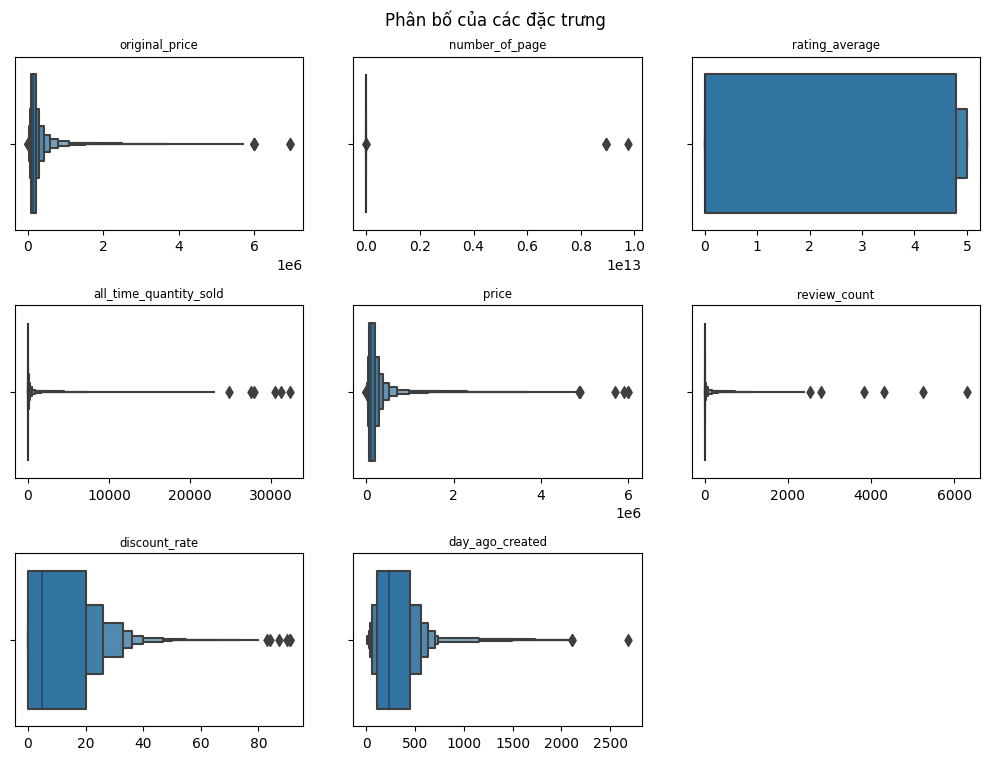

In [143]:
# df_cont = df.select_dtypes([int,float]) 
numeric_df = df[set(numeric_cols) - {'id', 'sku'}]

fig = plt.figure(figsize=(10, 10))
fig.suptitle('Ph√¢n b·ªë c·ªßa c√°c ƒë·∫∑c tr∆∞ng')
for i,col in enumerate(numeric_df.columns, 1): 
    ax = plt.subplot(4,3,i) 
    sns.boxenplot(data = numeric_df, x=numeric_df[col]) 
    plt.xlabel(None)
    plt.title(col, fontsize='small')
    plt.tight_layout(w_pad=3) 

plt.show() 

H·∫ßu nh∆∞ c√°c c·ªôt d·ªØ li·ªáu ƒë·ªÅu b·ªã l·ªách ph·∫£i (right-skewed)
- <font color=bone>*original_price*</font> v√† <font color=bone>*price*</font> c√≥ ph√¢n b·ªë kh√° gi·ªëng nhau, c√≥ v√†i ƒëi·ªÉm outliers kh√° l·ªõn
- <font color=bone>*day_ago_created*</font> th√¨ ph√¢n b·ªë t·∫≠p trung trong kho·∫£ng 0-500 v√† gi·∫£m d·∫ßn v·ªÅ 2000
- <font color=bone>*rating_average*</font> ph√¢n b·ªë kh√° ƒë·ªìng ƒë·ªÅu t·ª´ 0 ƒë·∫øn 5
- <font color=bone>*all_time_quantity_sold*</font> ph√¢n b·ªë ch·ªß y·∫øu ·ªü gi√° tr·ªã 0, x·∫•p x·ªâ 0 v√† r·∫£i r√°c t·ª´ 0 ƒë·∫øn h∆°n 30000
- <font color=bone>*review_count*</font> c≈©ng t∆∞∆°ng t·ª±, tuy nhi√™n n·∫±m r·∫£i r√°c t·ª´ 0 ƒë·∫øn h∆°n 6000
- <font color=bone>*discount_rate*</font> ch·ªß y·∫øu ph√¢n b·ªë t·ª´ 0-40 v√† th∆∞a th·ªõt ·ªü c√°c gi√° tr·ªã rate cao h∆°n
- Ri√™ng v·ªõi <font color=bone>*number_of_page*</font> c√≥ outlier kh√° "kh·ªßng" n√™n ta s·∫Ω x·ª≠ l√Ω ri√™ng v√† v·∫Ω l·∫°i bi·ªÉu ƒë·ªì c·ªßa c·ªôt n√†y

Text(0.5, 1.0, 'Ph√¢n b·ªë c·ªßa number_of_page sau khi clip c√°c gi√° tr·ªã ngo·∫°i l·ªá')

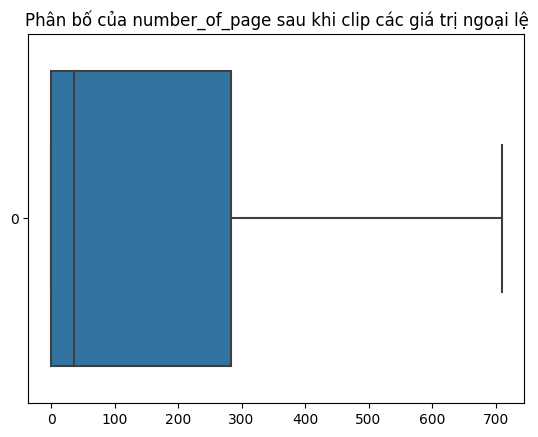

In [144]:
# ref: https://machinelearningcoban.com/tabml_book/ch_data_processing/process_outliers.html
from typing import Tuple
from sklearn.base import BaseEstimator, TransformerMixin
def find_boundaries(col: pd.Series, whisker_coeff: float = 1.5
) -> Tuple[float, float]:
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - whisker_coeff * IQR
    upper = Q3 + whisker_coeff * IQR
    return lower, upper

class BoxplotOutlierClipper(BaseEstimator, TransformerMixin):
    def __init__(self, whisker_coeff: float = 1.5):
        self.whisker = whisker_coeff
        self.lower = None
        self.upper = None

    def fit(self, X: pd.Series):
        self.lower, self.upper = find_boundaries(X, self.whisker)
        return self

    def transform(self, X):
        return X.clip(self.lower, self.upper)

numeric_df['number_of_page_clipped'] = BoxplotOutlierClipper().fit_transform(numeric_df['number_of_page'])
# print(numeric_df['number_of_page'].sort_values(ascending=False)[30:60])
sns.boxplot(data = numeric_df['number_of_page_clipped'].reset_index(drop=True)
              , orient='h')
plt.title('Ph√¢n b·ªë c·ªßa number_of_page sau khi clip c√°c gi√° tr·ªã ngo·∫°i l·ªá') 
# plt.xlim(0, 1e4)

**C√°c c·ªôt c√≥ gi√° tr·ªã thi·∫øu hay kh√¥ng? N·∫øu thi·∫øu th√¨ x·ª≠ l√Ω nh∆∞ th·∫ø n√†o?**

In [145]:
df[cols].isna().sum()

original_price                0
discount_rate                 0
rating_average                0
review_count                  0
day_ago_created               0
all_time_quantity_sold        0
number_of_page                0
book_cover                17075
categories                    0
inventory_type                0
manufacturer                  0
dtype: int64

C·ªôt `book_cover` thi·∫øu kh√° nhi·ªÅu, ta s·∫Ω xem qua c√°c gi√° tr·ªã c·ªßa c·ªôt n√†y

In [146]:
df['book_cover'].value_counts()

B√¨a m·ªÅm                                     27766
B√¨a c·ª©ng                                     2922
B√¨a g·∫≠p                                       366
B√¨a Da                                         43
B√¨a r·ªùi                                        26
B Format Paperback                             22
B√¨a Da C√¥ng Nghi·ªáp Microfiber                  21
Box                                            14
Boxset                                         12
T√πy ch·ªçn phi√™n b·∫£n b√¨a c·ª©ng ho·∫∑c b√¨a m·ªÅm        9
Paperback                                       7
Board book                                      2
Mix Media Pack                                  2
Jigsaw box                                      1
Counterpack holds 48 Mini Activity Books        1
B-format Paperback                              1
Hardcover                                       1
Name: book_cover, dtype: int64

Ngo√†i ra, c·ªôt <font color=bone>number_of_page</font> ch·ª©a c√°c gi√° tr·ªã 0 c≈©ng kh√° v√¥ l√Ω (cu·ªën s√°ch c√≥ 0 trang?), m·ªôt suy ƒëo√°n cho nh·ªØng gi√° tr·ªã n√†y c√≥ th·ªÉ l√† do thi·∫øu d·ªØ li·ªáu v·ªÅ s·ªë trang n√™n s·∫Ω m·∫∑c ƒë·ªãnh l√† 0. 
- C√≥ th·ªÉ ph·∫£i b·ªè c√°c d√≤ng c√≥ gi√° tr·ªã n√†y ƒë·ªÉ tr√°nh th√™m v√†o ƒëi·ªÉm d·ªØ li·ªáu b·∫•t h·ª£p l√Ω?
- M·ªôt c√°ch kh√°c l√† ƒëi·ªÅn v√†o c√°c gi√° tr·ªã theo m·∫≠t ƒë·ªô xu·∫•t hi·ªán c·ªßa c√°c gi√° tr·ªã ƒë√£ bi·∫øt?

In [147]:
df[df['book_cover'].isna()].sample(5)

id            sku  \
6347   200918645  6858158570594   
10675   77855700  7733640048051   
40639   90984943  5987615782190   
28727  130390308  8323208400892   
41846  198746477  8851510568518   

                                                    name  \
6347                            S√°ch - Hy v·ªçng mong manh   
10675  Combo 2 cu·ªën s√°ch: S·ªëc s·ª± tr·ªói d·∫≠y c·ªßa ch·ªß n g...   
40639  Si√™u Ph·∫©m Tranh T√¥ M√†u: M√¨nh Ch·ªâ L√† Ng∆∞·ªùi B√¨nh...   
28727  Combo 4 Cu·ªën Ti·∫øng H√†n T·ªïng H·ª£p S∆° C·∫•p 1 v√† 2 ...   
41846                              ƒê·ª©c ph·∫≠t v√† Ph·∫≠t ph√°p   

                                               short_url book_cover   price  \
6347   https://tiki.vn/product-p200918645.html?spid=2...        NaN  144000   
10675  https://tiki.vn/product-p77855700.html?spid=12...        NaN  290000   
40639  https://tiki.vn/product-p90984943.html?spid=90...        NaN  103500   
28727  https://tiki.vn/product-p130390308.html?spid=1...        NaN  308000   
41846  https://tiki.vn/product-p198746477.html?spid=1...        NaN  216000   

       original_price  discount_rate  rating_average  review_count  \
6347           158000              9             0.0             0   
10675          290000              0             0.0             0   
40639          103500              0             4.8            44   
28727          440000             30             5.0            66   
41846          250000             14             0.0             0   

      inventory_type                              productset_group_name  \
6347       backorder  Nh√† S√°ch Tiki/S√°ch ti·∫øng Vi·ªát/S√°ch vƒÉn h·ªçc/Tru...   
10675      backorder  Nh√† S√°ch Tiki/S√°ch ti·∫øng Vi·ªát/S√°ch kinh t·∫ø/B√†i...   
40639      backorder  Nh√† S√°ch Tiki/S√°ch ti·∫øng Vi·ªát/ƒêi·ªán ·∫¢nh - Nh·∫°c ...   
28727        instock  Nh√† S√°ch Tiki/S√°ch ti·∫øng Vi·ªát/S√°ch H·ªçc Ngo·∫°i N...   
41846      backorder  Nh√† S√°ch Tiki/S√°ch ti·∫øng Vi·ªát/S√°ch T√¥n Gi√°o - ...   

       day_ago_created                      categories  \
6347                50                      Truy·ªán d√†i   
10675              648              B√†i h·ªçc kinh doanh   
40639              599  S√°ch T√¥ M√†u D√†nh Cho Ng∆∞·ªùi L·ªõn   
28727              414              S√°ch H·ªçc Ti·∫øng H√†n   
41846               61        S√°ch T√¥n Gi√°o - T√¢m Linh   

       all_time_quantity_sold authors publisher_vn publication_date  \
6347                        0     NaN      Nh√£ Nam              NaT   
10675                       1     NaN      Nh√£ Nam              NaT   
40639                     127     NaN      Skybook              NaT   
28727                     261     NaN      MCBOOKS              NaT   
41846                      20     NaN  Cty C·ª≠u ƒê·ª©c              NaT   

      dimensions                          manufacturer  number_of_page  \
6347         NaN                   Nh√† Xu·∫•t B·∫£n H√† N·ªôi               0   
10675        NaN                 Nh√† Xu·∫•t B·∫£n Th·∫ø Gi·ªõi               0   
40639        NaN          Nh√† Xu·∫•t B·∫£n Ph·ª• N·ªØ Vi·ªát Nam               0   
28727        NaN  Nh√† Xu·∫•t B·∫£n ƒê·∫°i H·ªçc Qu·ªëc Gia H√† N·ªôi               0   
41846        NaN                 Nh√† Xu·∫•t B·∫£n H·ªìng ƒê·ª©c             540   

      dich_gia edition luu_y  
6347       NaN     NaN   NaN  
10675      NaN     NaN   NaN  
40639      NaN     NaN   NaN  
28727      NaN     NaN   NaN  
41846      NaN     NaN   NaN

Thay c√°c gi√° tr·ªã 0 th√†nh nan ƒë·ªÉ ph·ª•c v·ª• cho giai ƒëo·∫°n x·ª≠ l√Ω missing value 

In [148]:
df['number_of_page'].replace(0, np.nan, inplace=True)

### **X·ª≠ l√Ω c√°c gi√° tr·ªã ngo·∫°i l·ªá**

In [149]:
df['number_of_page'] = BoxplotOutlierClipper().fit_transform(df['number_of_page'])

In [150]:
features = df[cols].copy()

#### **Ph√¢n chia t·∫≠p train/val/test**

In [151]:
x_df = features[set(cols) - {'discount_rate'}]
y_df = features['discount_rate']

x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.2, random_state=5) # T√°ch t·∫≠p test/train
# x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=5) # T√°ch t·∫≠p train/val t·ª´ t·∫≠p train


#### **Pipeline cho b∆∞·ªõc ti·ªÅn x·ª≠ l√Ω**

In [152]:
# df['book_cover'].fillna('Kh√¥ng c√≥ b√¨a', inplace=True)
cate = [ 'book_cover', 'categories','inventory_type', 'manufacturer']
nume = ['original_price', 'rating_average', 'review_count', 'day_ago_created','all_time_quantity_sold',
        'number_of_page']

# Pipeline x·ª≠ l√Ω cho c√°c c·ªôt category
cate_transformer = Pipeline(steps= [('imputer', SimpleImputer(strategy='most_frequent')), # Thay th·∫ø missing value b·∫±ng gi√° tr·ªã c√≥ t·∫ßn su·∫•t xu·∫•t hi·ªán cao
                               ('OneHotEncoder', OneHotEncoder(handle_unknown='ignore'))]) # bi·ªÉu di·ªÖn one hot cho c√°c c·ªôt category
                                                                                # ƒë·ªëi v·ªõi c√°c gi√° tr·ªã m√† model ch∆∞a t·ª´ng th·∫•y bao gi·ªù (trong t·∫≠p test) th√¨ ta b·ªè qua
# Pipeline x·ª≠ l√Ω cho c√°c c·ªôt numeric
nume_transfomer = Pipeline(steps= [('imputer', KNNImputer(n_neighbors=10)), # thay th·∫ø missing value b·∫±ng thu·∫≠t to√°n k-nearest v·ªõi s·ªë l∆∞·ª£ng l√°ng gi·ªÅng l√† 10
                                   ('scaler', MinMaxScaler())])  # scale c√°c gi√° tr·ªã v·ªÅ mi·ªÅn gi√° tr·ªã trong kho·∫£ng 0 ƒë·∫øn 1 

# Pipeline cho b∆∞·ªõc ti·ªÅn x·ª≠ l√Ω chung 
preprocessor = ColumnTransformer(transformers=[('cate_transformer', cate_transformer, cate),
                                                ('nume_transfomer',nume_transfomer, nume)])

## **5. Hu·∫•n luy·ªán m√¥ h√¨nh**

#### **Linear Regression**

In [153]:
model = LinearRegression()
lr_pl = Pipeline(steps=[('preprocessor', preprocessor),
                                ('linear_regression', model)])


lr_pl.fit(x_train, y_train)
y_train_pred = lr_pl.predict(x_train)

In [154]:
y_test_pred = lr_pl.predict(x_test)

In [155]:
print(f'Train set: [MSE: {mean_squared_error(y_train, y_train_pred):.3f}, MAE: {mean_absolute_error(y_train, y_train_pred):.3f}]')
print(f'Test set: [MSE: {mean_squared_error(y_test, y_test_pred):.3f}, MAE: {mean_absolute_error(y_test, y_test_pred):.3f}]')


Train set: [MSE: 108.656, MAE: 8.093]
Test set: [MSE: 109.089, MAE: 8.093]


M√¥ h√¨nh n√†y cho ra ƒë·ªô l·ªói kh√° t·ªët

#### **Cross validation**

In [156]:
# X√°c ƒë·ªãnh KFold
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
cv = KFold(n_splits = 5, shuffle = True, random_state = 100)

cv_pl = Pipeline(
    steps=[("preprocessor", preprocessor), ('regression', LinearRegression())])

scores_cv = cross_validate(cv_pl, x_train, y_train, scoring=['neg_mean_absolute_error','neg_mean_squared_error'], 
                           cv=cv, error_score='raise')
 

In [157]:
scores_cv

{'fit_time': array([21.32269502, 21.20814848, 21.15967679, 21.05442786, 21.22999907]),
 'score_time': array([5.0442698 , 5.22315907, 5.15110135, 5.13811898, 5.08177447]),
 'test_neg_mean_absolute_error': array([-8.09780729, -8.14291943, -8.14661257, -8.26680874, -8.13795453]),
 'test_neg_mean_squared_error': array([-107.44886289, -110.21544083, -111.09801375, -111.47541862,
        -112.0272968 ])}

In [158]:
print('Mean NMAE: {:.03f}, Std: {:.03f}'
      .format(np.mean(scores_cv['test_neg_mean_absolute_error'], dtype=np.float64), np.std(scores_cv['test_neg_mean_absolute_error'])))
print('Mean NMSE: {:.03f}, Std: {:.03f}'
      .format(np.mean(scores_cv['test_neg_mean_squared_error'], dtype=np.float64), np.std(scores_cv['test_neg_mean_squared_error'])))

Mean NMAE: -8.158, Std: 0.057
Mean NMSE: -110.453, Std: 1.614


#### **ƒê√°nh gi√° nhi·ªÅu m√¥ h√¨nh v·ªõi nhi·ªÅu metric kh√°c nhau**

In [159]:
models = [LinearRegression(), RandomForestRegressor(), GradientBoostingRegressor(), TransformedTargetRegressor()]

# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
cv = KFold(n_splits = 5, shuffle = True, random_state = 100)

all_scores = []
metric = ['neg_mean_squared_error', 'neg_mean_absolute_error', 'neg_root_mean_squared_error', 'neg_mean_absolute_percentage_error']
# ƒê√°nh gi√° to√†n b·ªô c√°c m√¥ h√¨nh tr√™n t·∫≠p K-Fold ƒë√£ chia
for model in models:
  multi_model_pl = Pipeline(
    steps=[("preprocessor", preprocessor), ('regression', model)]
  )

  scores = cross_validate(multi_model_pl, x_train, y_train, scoring=metric, cv=cv)
  print(str(model) + ' done!')
  all_scores.append(scores)

LinearRegression() done!
RandomForestRegressor() done!
GradientBoostingRegressor() done!
TransformedTargetRegressor() done!


In [160]:
all_scores_df = pd.DataFrame(all_scores)
# os.mkdir('./evaluating')
all_scores_df.to_csv('../evaluating/all_scores.csv', index_label=False)
all_scores_df.head()

fit_time  \
0  [21.265028476715088, 21.407465934753418, 21.34...   
1  [198.69463276863098, 195.0876293182373, 198.01...   
2  [25.13448143005371, 25.29457449913025, 25.4351...   
3  [21.226370334625244, 21.36617112159729, 21.120...   

                                          score_time  \
0  [5.1576128005981445, 5.215100526809692, 5.1141...   
1  [5.294825077056885, 5.441352844238281, 5.66604...   
2  [5.076120376586914, 5.283234596252441, 5.16953...   
3  [5.1163880825042725, 5.161198616027832, 5.1090...   

                         test_neg_mean_squared_error  \
0  [-107.44886289396524, -110.21544082960116, -11...   
1  [-84.03725515270729, -83.4268322912946, -88.15...   
2  [-107.65843259174753, -108.48024760314328, -10...   
3  [-107.44886289396524, -110.21544082960116, -11...   

                        test_neg_mean_absolute_error  \
0  [-8.097807285939364, -8.142919430442728, -8.14...   
1  [-6.585242854062154, -6.547787710918746, -6.70...   
2  [-8.316522055700643, -8.323245186828705, -8.36...   
3  [-8.097807285939364, -8.142919430442728, -8.14...   

                    test_neg_root_mean_squared_error  \
0  [-10.365754333089573, -10.498354196234816, -10...   
1  [-9.167183599814464, -9.133829004929675, -9.38...   
2  [-10.375858161701496, -10.415385139453235, -10...   
3  [-10.365754333089573, -10.498354196234816, -10...   

             test_neg_mean_absolute_percentage_error  
0  [-1.5898539144158372e+16, -1.5981910727277648e...  
1  [-1.142358524208342e+16, -1.174745446331924e+1...  
2  [-1.6283554341251592e+16, -1.652765471495658e+...  
3  [-1.5898539144158372e+16, -1.5981910727277648e...

T√≠nh mean v√† standard deviation c·ªßa t·ª´ng gi√° tr·ªã trong `all_scores_df`

In [161]:
models = ['LinearRegression', 'RandomForestRegressor', 'GradientBoostingRegressor', 'TransformedTargetRegressor']
def get_mean_std(x):
    return x.mean(), x.std()

all_scores_df.index = models
all_scores_df.applymap(get_mean_std)

fit_time  \
LinearRegression            (21.26108589172363, 0.10672700660664831)   
RandomForestRegressor        (197.7618579864502, 1.3602663130030668)   
GradientBoostingRegressor    (25.22551589012146, 0.1343232975688086)   
TransformedTargetRegressor  (21.28240180015564, 0.27061145817285737)   

                                                          score_time  \
LinearRegression            (5.157839012145996, 0.05481046223420004)   
RandomForestRegressor        (5.451717185974121, 0.1207729781962087)   
GradientBoostingRegressor   (5.165443801879883, 0.06721225715013691)   
TransformedTargetRegressor  (5.148399448394775, 0.04020287558776939)   

                                          test_neg_mean_squared_error  \
LinearRegression            (-110.45300657878252, 1.6137575463328362)   
RandomForestRegressor        (-85.34594751810144, 1.7928897536019563)   
GradientBoostingRegressor   (-109.43036215433676, 1.1836446839293895)   
TransformedTargetRegressor  (-110.45300657878252, 1.6137575463328362)   

                                          test_neg_mean_absolute_error  \
LinearRegression              (-8.15842051368069, 0.05695707030104924)   
RandomForestRegressor        (-6.625639258505643, 0.05519103253957648)   
GradientBoostingRegressor   (-8.372662693361198, 0.054265532354632676)   
TransformedTargetRegressor    (-8.15842051368069, 0.05695707030104924)   

                                      test_neg_root_mean_squared_error  \
LinearRegression               (-10.50937992310838, 0.077072761394665)   
RandomForestRegressor        (-9.237780029323428, 0.09678661030684575)   
GradientBoostingRegressor   (-10.460743550808306, 0.05662612965049182)   
TransformedTargetRegressor     (-10.50937992310838, 0.077072761394665)   

                                  test_neg_mean_absolute_percentage_error  
LinearRegression            (-1.5835003223297856e+16, 318908958653418.75)  
RandomForestRegressor       (-1.1593199437449684e+16, 220496994003945.66)  
GradientBoostingRegressor    (-1.6376414272568394e+16, 193006170269138.1)  
TransformedTargetRegressor  (-1.5835003223297856e+16, 318908958653418.75)

D·ª±a v√†o b·∫£ng c√≥ th·ªÉ th·∫•y m√¥ h√¨nh <font color=bone>RandomForest</font> cho ƒë·ªô l·ªói t·ªët nh·∫•t, tuy nhi√™n <font color=bone>fit_time</font> v√† <font color=bone>score_time</font> l√† cao nh·∫•t.

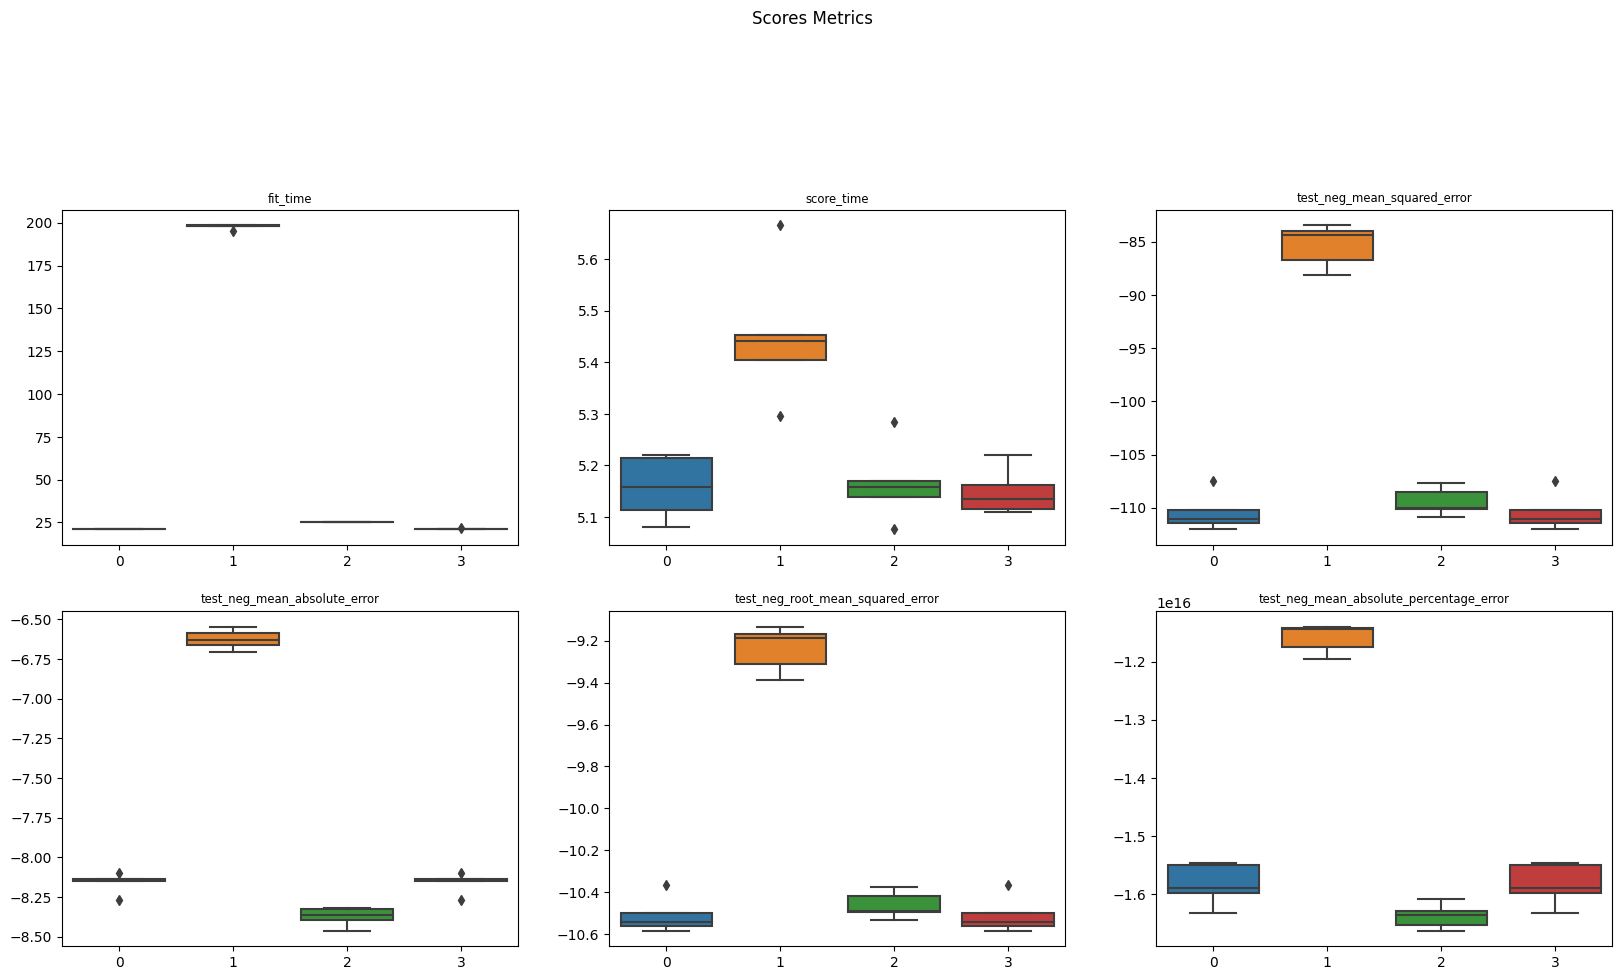

In [162]:
plt.figure(figsize=(20, 20))
plt.suptitle("Scores Metrics")
for i,col in enumerate(all_scores_df.columns, 1): 
    ax = plt.subplot(4,3,i) 
    sns.boxplot(all_scores_df[col])
    plt.title(col, fontsize='small')
    # plt.tight_layout(w_pad=3) 

V·∫≠y m√¥ h√¨nh ƒë∆∞·ª£c ch·ªçn l√†: RandomForestRegression

In [163]:
rf_pl = Pipeline(
    steps=[("preprocessor", preprocessor), ('RandomForestRegression', RandomForestRegressor())])

rf_pl.fit(x_train, y_train)
y_train_pred = rf_pl.predict(x_train)

In [164]:
y_test_pred = rf_pl.predict(x_test)

In [165]:
print(f'Train set: [MSE: {mean_squared_error(y_train, y_train_pred):.3f}, MAE: {mean_absolute_error(y_train, y_train_pred):.3f}]')
print(f'Test set: [MSE: {mean_squared_error(y_test, y_test_pred):.3f}, MAE: {mean_absolute_error(y_test, y_test_pred):.3f}]')

Train set: [MSE: 12.337, MAE: 2.444]
Test set: [MSE: 81.455, MAE: 6.460]


C√≥ th·ªÉ th·∫•y ƒë·ªô l·ªói tr√™n t·∫≠p train v√† t·∫≠p test ƒë·ªÅu c·∫£i thi·ªán kh√° nhi·ªÅu so v·ªõi c√°c m√¥ h√¨nh tr√™n

### **Fine-tuning process**

S·ª≠ d·ª•ng kƒ© thu·∫≠t RandomizedSearchCV()

Ph∆∞∆°ng ph√°p n√†y t√¨m ki·∫øm ng·∫´u nhi√™n tr√™n kh√¥ng gian tham s·ªë, k·∫øt h·ª£p v·ªõi KFold v√† ch·ªçn ra b·ªô tham s·ªë t·ªët nh·∫•t cho m√¥ h√¨nh. 

In [166]:
n_estimators = [200 , 400, 600, 800, 1000, 1200] # s·ªë l∆∞·ª£ng c√¢y 
# max_features = ['auto', 'sqrt'] # c√°ch t√≠nh s·ªë l∆∞·ª£ng ƒë·∫∑c tr∆∞ng m·ªói l·∫ßn split
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)] # ƒë·ªô s√¢u t·ªëi ƒëa c·ªßa c√¢y
min_samples_split = [2, 6, 10] # s·ªë l∆∞·ª£ng m·∫´u t·ªëi thi·ªÉu trong m·ªôt node
min_samples_leaf = [1, 3, 4] # s·ªë l∆∞·ª£ng m·∫´u t·ªëi thi·ªÉu trong m·ªôt node l√°
bootstrap = [True, False] # c√°ch l·∫•y m·∫´u (c√≥ ho√†n l·∫°i hay kh√¥ng)

random_grid = {'n_estimators': n_estimators,

# 'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [167]:
rf = RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               scoring='neg_mean_absolute_error', #return_train_score=True,
                               n_iter = 100, cv = 5, verbose=2, random_state=10, n_jobs = 10)

completed_pl = Pipeline(
    steps=[("preprocessor", preprocessor), ('model', rf_random)])

completed_pl.fit(x_train, y_train)
y_train_pred = completed_pl.predict(x_train)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


M·∫•t g·∫ßn 10 ti·∫øng ƒë·ªÉ train.. üòÖüò¢

In [168]:
y_test_pred = completed_pl.predict(x_test)

In [169]:
print(completed_pl)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cate_transformer',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('OneHotEncoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['book_cover', 'categories',
                                                   'inventory_type',
                                                   'manufacturer']),
                                                 ('nume_transfomer',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer(n_neighbors=10)),
                                                        

**Si√™u tham s·ªë cho k·∫øt qu·∫£ t·ªët nh·∫•t l√†:**

In [170]:
print ('Random grid: ', random_grid, '\n')
print ('Best Parameters: ', completed_pl['model'].best_params_, ' \n')

Random grid:  {'n_estimators': [200, 400, 600, 800, 1000, 1200], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 1200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 70, 'bootstrap': True}  



In [175]:
result = pd.DataFrame(completed_pl['model'].cv_results_)
result.to_csv('../evaluating/result.csv')
result.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0    1867.801343     34.284947         1.659517        0.043342   
1    1164.991161     38.124311         1.203465        0.035082   
2     541.546468     13.720680         0.642490        0.023635   
3    1464.216083      9.291610         1.917505        0.029350   
4    1462.887115      4.331047         1.878275        0.022403   

  param_n_estimators param_min_samples_split param_min_samples_leaf  \
0                800                       6                      1   
1                800                       6                      3   
2                400                       2                      1   
3               1200                      10                      4   
4               1200                      10                      4   

  param_max_depth param_bootstrap  \
0              50           False   
1              30           False   
2              30            True   
3             100            True   
4              90            True   

                                              params  split0_test_score  \
0  {'n_estimators': 800, 'min_samples_split': 6, ...          -7.547958   
1  {'n_estimators': 800, 'min_samples_split': 6, ...          -7.918296   
2  {'n_estimators': 400, 'min_samples_split': 2, ...          -7.023543   
3  {'n_estimators': 1200, 'min_samples_split': 10...          -7.096164   
4  {'n_estimators': 1200, 'min_samples_split': 10...          -7.093834   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0          -7.483357          -7.611376          -7.507266          -7.387860   
1          -7.617036          -7.720379          -7.620284          -7.607896   
2          -6.919772          -6.920233          -6.992489          -6.942119   
3          -6.918870          -7.023065          -7.049139          -6.997834   
4          -6.919668          -7.022833          -7.053399          -6.995312   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0        -7.507563        0.073924               52           -1.955676   
1        -7.696778        0.118099               76           -4.779714   
2        -6.959631        0.041502               23           -4.303534   
3        -7.017014        0.058878               31           -4.826481   
4        -7.017009        0.058662               30           -4.823958   

   split1_train_score  split2_train_score  split3_train_score  \
0           -2.000692           -1.979601           -2.135737   
1           -4.762907           -4.528400           -4.725739   
2           -4.489461           -4.336861           -4.383871   
3           -4.842707           -4.849623           -4.812656   
4           -4.843258           -4.853259           -4.814806   

   split4_train_score  mean_train_score  std_train_score  
0           -2.029928         -2.020327         0.062667  
1           -4.667259         -4.692804         0.090812  
2           -4.395273         -4.381800         0.063122  
3           -4.858663         -4.838026         0.016488  
4           -4.858094         -4.838675         0.016716

M√¥ h√¨nh ho√†n ch·ªânh v·ªõi best parameters t·ª´ k·ªπ thu·∫≠t Randomized search CV

In [176]:
rf = RandomForestRegressor(n_estimators=1200, min_samples_split=2, min_samples_leaf=1, 
                           max_features=None, max_depth=70, bootstrap=True)

last_pl = Pipeline(
    steps=[("preprocessor", preprocessor), ('model', rf)])

last_pl.fit(x_train, y_train)
y_train_pred = last_pl.predict(x_train)

In [177]:
y_test_pred = last_pl.predict(x_test)

In [178]:
print(f'Train set: [MSE: {mean_squared_error(y_train, y_train_pred):.3f}, MAE: {mean_absolute_error(y_train, y_train_pred):.3f}]')
print(f'Test set: [MSE: {mean_squared_error(y_test, y_test_pred):.3f}, MAE: {mean_absolute_error(y_test, y_test_pred):.3f}]')

Train set: [MSE: 11.929, MAE: 2.435]
Test set: [MSE: 80.722, MAE: 6.446]


Kh√¥ng c·∫£i thi·ªán nhi·ªÅu l·∫Øm so v·ªõi khi ta s·ª≠ d·ª•ng thu·∫≠t to√°n Random Forest m·∫∑c ƒë·ªãnh (kh√¥ng tinh ch·ªânh c√°c si√™u tham s·ªë).

V·∫≠y ta s·∫Ω ch·ªçn RandomForestRegression v·ªõi tham s·ªë m·∫∑c ƒë·ªãnh ƒë·ªÉ t·ªëi ∆∞u th·ªùi gian ch·∫°y v√† ƒë·ªô l·ªói c·ªßa m√¥ h√¨nh.

In [179]:
cv = KFold(n_splits = 5, shuffle = True, random_state = 100)
rf_pl = Pipeline(
    steps=[("preprocessor", preprocessor), ('RandomForestRegression', RandomForestRegressor())])

scores_rf = cross_validate(rf_pl, x_train, y_train, scoring=['neg_mean_absolute_error','neg_mean_squared_error'], 
                           cv=cv, error_score='raise')

# y_test_pred = rf_pl.predict(x_test)

In [180]:
scores_rf

{'fit_time': array([199.18840861, 195.72181177, 199.62304211, 197.37192154,
        199.98024821]),
 'score_time': array([5.40556192, 5.64786363, 5.39790964, 5.88061094, 5.47071266]),
 'test_neg_mean_absolute_error': array([-6.61171408, -6.56938425, -6.71282797, -6.67745098, -6.65631803]),
 'test_neg_mean_squared_error': array([-84.63116823, -84.01721827, -88.38633296, -84.88035362,
        -87.00844512])}

In [181]:
print('Mean NMAE: {:.03f}, Std: {:.03f}'
      .format(np.mean(scores_rf['test_neg_mean_absolute_error'], dtype=np.float64), np.std(scores_rf['test_neg_mean_absolute_error'])))
 
print('Mean NMSE: {:.03f}, Std: {:.03f}'
      .format(np.mean(scores_rf['test_neg_mean_squared_error'], dtype=np.float64), np.std(scores_rf['test_neg_mean_squared_error'])))

Mean NMAE: -6.646, Std: 0.050
Mean NMSE: -85.785, Std: 1.646
